<a href="https://colab.research.google.com/github/caramelpopcornKHU/caramelpopcornKHU/blob/main/global_teamPlay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import tensorflow as tf

In [ ]:
health_df = pd.read_sas('/content/drive/MyDrive/Colab Notebooks/글로벌 팀플/hn22_all.sas7bdat')

In [ ]:
manip_df2 = health_df.loc[:,["BP1","sex","age","incm","edu","D_1_1","BP16_1","BO1","BP_PHQ_2","N_WAT_C","L_BR_FQ"]]

In [ ]:
manip_df2.dropna()

,BP1,sex,age,incm,edu,D_1_1,BP16_1,BO1,BP_PHQ_2,N_WAT_C,L_BR_FQ
0,2.0,2.0,56.0,3.0,3.0,3.0,8.0,4.0,2.0,3.5,3.0
1,3.0,1.0,30.0,3.0,4.0,2.0,7.0,4.0,1.0,14.9,1.0
2,2.0,2.0,25.0,3.0,4.0,2.0,6.0,4.0,1.0,10.0,4.0
3,4.0,1.0,66.0,3.0,4.0,2.0,9.0,3.0,0.0,5.0,1.0
4,3.0,2.0,62.0,3.0,3.0,2.0,7.0,3.0,0.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
6255,3.0,1.0,24.0,4.0,3.0,2.0,7.0,2.0,0.0,2.5,1.0
6260,3.0,2.0,26.0,1.0,4.0,2.0,8.0,2.0,0.0,3.0,1.0
6262,3.0,2.0,58.0,4.0,4.0,3.0,6.0,4.0,0.0,10.0,1.0
6263,3.0,1.0,62.0,4.0,4.0,2.0,7.0,4.0,0.0,10.0,4.0


In [ ]:
# 결측치 제거
manip_df2.dropna(inplace= True)

# BP1 변수
(큰 값이 빈도 높은 값이여야 됨)
### 값
1. 대단히 많이 느낀다
2. 많이 느끼는 편이다.
3. 조금 느끼는 편이다
4. 거의 느끼지 않는다
8. 비해당(소아)
9. 모름, 무응답
### 응답 값이 높으면 스트레스 작음 -> 삶의 질 높음
### 따라서, BP1 값은 높을 수록 삶의 질 높음


# L_BR_FQ 변수
(큰 값이 빈도 높은 값이여야 됨)
### 값
1. 주5~7회
2. 주3~4회
3. 주1~2회
4. 거의 안한다(0회)
5. 모름/무응답
### 이걸 큰 값이 높은 빈도로 바꿔줄거임 5번 항목 제거하고
4 -> 1   
3 -> 2   
2 -> 3    
1 -> 4

In [ ]:
# L_BR_FQ 필드의 조건들
L_BR_FQ_condition1 = manip_df2.loc[:,'L_BR_FQ'] == 1
L_BR_FQ_condition2 = manip_df2.loc[:,'L_BR_FQ'] == 2
L_BR_FQ_condition3 = manip_df2.loc[:,'L_BR_FQ'] == 3
L_BR_FQ_condition4 = manip_df2.loc[:,'L_BR_FQ'] == 4


In [ ]:
# 값을 빈도와 syncornize
manip_df2.loc[L_BR_FQ_condition1,'L_BR_FQ'] = 4
manip_df2.loc[L_BR_FQ_condition2,'L_BR_FQ'] = 3
manip_df2.loc[L_BR_FQ_condition3,'L_BR_FQ'] = 2
manip_df2.loc[L_BR_FQ_condition4,'L_BR_FQ'] = 1

In [ ]:
#부실한 응답 제거
condition_BP1 = manip_df2.loc[:,'BP1'].isin([8, 9])
condition_D_1_1 = manip_df2.loc[:,'D_1_1'] == 9
condition_BP16_1 = manip_df2.loc[:,'BP16_1'].isin([88, 99])
condition_BO1 = manip_df2.loc[:,'BO1'].isin([8, 9])
condition_L_BR_FQ = manip_df2.loc[:,'L_BR_FQ'] == 9
condition_BP_PHQ_2 = manip_df2.loc[:,'BP_PHQ_2'].isin([8, 9])

In [ ]:
condition_mix = condition_BP1 | condition_D_1_1 | condition_BP16_1 | condition_BO1 | condition_L_BR_FQ | condition_BP_PHQ_2

In [ ]:
# 조건에 벗어나는 레코드 제거
manip_df2.drop(manip_df2[condition_mix].index,axis=0,inplace=True)

In [ ]:
# 목표변수와 입력변수 나누기
y = manip_df2.iloc[:,[0]]
X = manip_df2.iloc[:,1:]

In [ ]:
# 남성은 1, 여성은 2로 되어 있음 고로 원헛 인코딩을 위하여 조건 생성
condition_male = X.loc[:,'sex']==1
condition_female = X.loc[:,'sex']==2

In [ ]:
X.loc[condition_male,'sex'] = 'M'
X.loc[condition_female,'sex'] = "F"

<ipython-input-13-cec5b9332978>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'M' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  X.loc[condition_male,'sex'] = 'M'


In [ ]:
# one_hot_encoding

pd.get_dummies(X)

,age,incm,edu,D_1_1,BP16_1,BO1,BP_PHQ_2,N_WAT_C,L_BR_FQ,sex_F,sex_M
0,56.0,3.0,3.0,3.0,8.0,4.0,2.0,3.5,2.0,True,False
1,30.0,3.0,4.0,2.0,7.0,4.0,1.0,14.9,4.0,False,True
2,25.0,3.0,4.0,2.0,6.0,4.0,1.0,10.0,1.0,True,False
3,66.0,3.0,4.0,2.0,9.0,3.0,0.0,5.0,4.0,False,True
4,62.0,3.0,3.0,2.0,7.0,3.0,0.0,5.0,4.0,True,False
...,...,...,...,...,...,...,...,...,...,...,...
6255,24.0,4.0,3.0,2.0,7.0,2.0,0.0,2.5,4.0,False,True
6260,26.0,1.0,4.0,2.0,8.0,2.0,0.0,3.0,4.0,True,False
6262,58.0,4.0,4.0,3.0,6.0,4.0,0.0,10.0,4.0,True,False
6263,62.0,4.0,4.0,2.0,7.0,4.0,0.0,10.0,1.0,False,True


In [ ]:
X = pd.get_dummies(X)

In [ ]:
import numpy as np
# 데이터 타입 변환 (TensorFlow는 float32 형식을 선호)
X = X.astype(np.float32)
y = y.astype(np.float32)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Convert to DataFrames if desired
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

print("Scaled Training Data:\n", X_train_scaled_df)
print("\nScaled Test Data:\n", X_test_scaled_df)

Scaled Training Data:
            age      incm       edu  D_1_1    BP16_1   BO1  BP_PHQ_2   N_WAT_C  \
0     0.770492  0.666667  1.000000   0.25  0.333333  0.25  0.000000  0.100000   
1     0.672131  0.333333  0.666667   0.50  0.333333  0.50  0.000000  0.100000   
2     0.868852  0.333333  0.000000   0.00  0.500000  0.75  0.000000  0.100000   
3     0.557377  0.333333  0.666667   0.75  0.666667  0.50  0.333333  0.283333   
4     0.360656  0.333333  1.000000   0.25  0.333333  0.50  0.000000  0.100000   
...        ...       ...       ...    ...       ...   ...       ...       ...   
3636  0.508197  0.333333  1.000000   0.75  0.333333  1.00  0.000000  0.166667   
3637  0.639344  0.333333  0.666667   0.25  0.250000  0.50  0.000000  0.100000   
3638  0.786885  0.333333  0.333333   0.50  0.416667  1.00  0.000000  0.066667   
3639  0.901639  0.000000  0.000000   0.50  0.500000  1.00  0.000000  0.100000   
3640  0.000000  1.000000  0.666667   0.50  0.583333  0.75  0.000000  0.133333   

    

# 다중선형회귀 모델

In [ ]:
# 통계분석 라이브러리 OLS용
# 첫 번째 Dense 레이어의 가중치 가져오기
import statsmodels.api as sm
from statsmodels.api import OLS

In [ ]:
# 상수 항 추가 (절편)
X = sm.add_constant(X)

In [ ]:
OLS_model1 = OLS(y,X).fit()

In [ ]:
print(OLS_model1.summary())

                            OLS Regression Results                            
Dep. Variable:                    BP1   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     122.9
Date:                Sat, 16 Nov 2024   Prob (F-statistic):          1.31e-227
Time:                        05:47:26   Log-Likelihood:                -4500.0
No. Observations:                4552   AIC:                             9022.
Df Residuals:                    4541   BIC:                             9093.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9022      0.066     28.655      0.0

In [ ]:
# 상관관계 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 변수들 간의 상관관계 계산
correlation_matrix = X.corr()
correlation_matrix = pd.DataFrame(correlation_matrix).iloc[1:,1:]

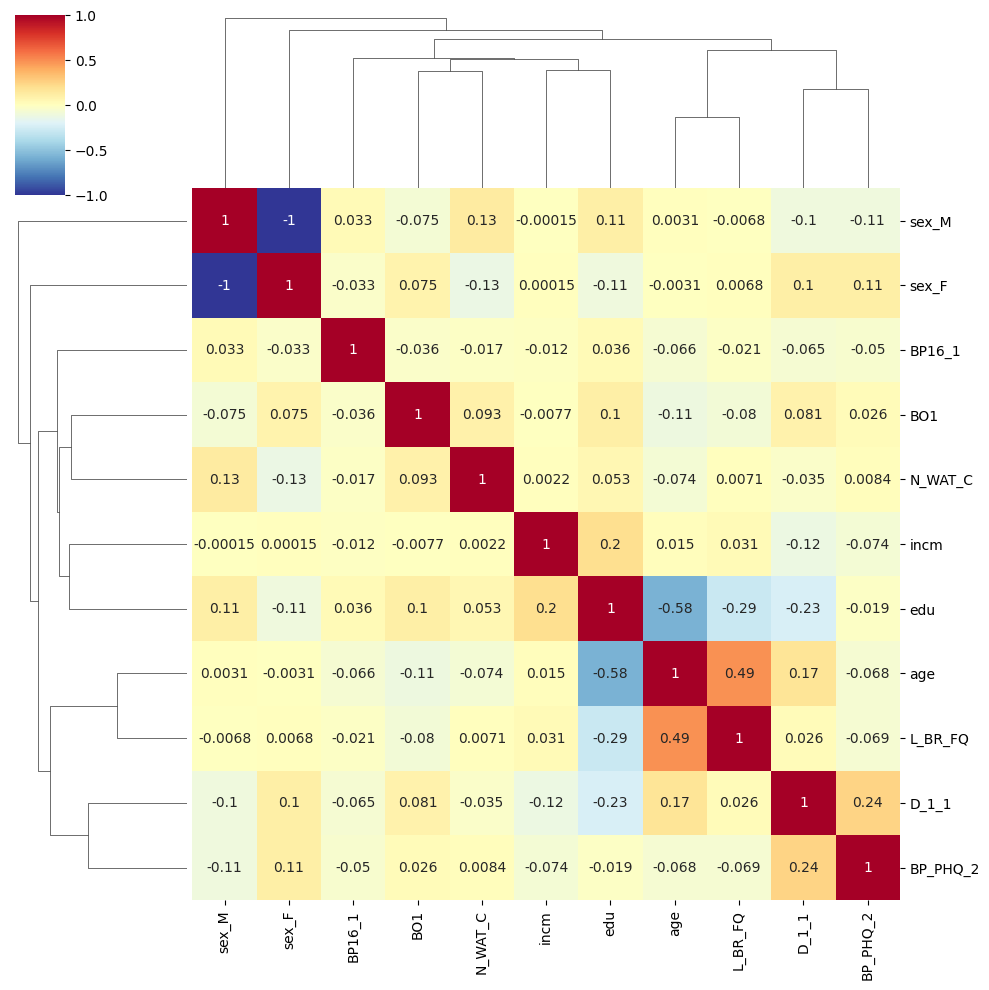

In [ ]:
sns.clustermap(correlation_matrix,
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )

# 그리드 서치 모델

In [ ]:
#라이브러리
from tensorflow import keras
from keras_tuner import RandomSearch

In [ ]:
def model_build(hp):
  model = tf.keras.Sequential()

  # 첫 번째 은닉층
  model.add(keras.layers.Dense(
        units=hp.Int('units_layer1', min_value=32, max_value=256, step=32),
        activation='relu',
        input_shape=(X_train.shape[1],)  # 입력 차원 (특성 개수)
  ))

  # 추가 은닉층 개수
  for i in range(hp.Int('num_layers', 1, 3)):
      model.add(keras.layers.Dense(
          units=hp.Int(f'units_layer_{i+2}', min_value=32, max_value=256, step=32),
          activation='relu'
        ))

  # 출력층 (회귀 문제이므로 활성화 함수 없음)
  model.add(keras.layers.Dense(1))
  # 모델 컴파일
  model.compile(
      optimizer=keras.optimizers.Adam(
          hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
        ),
        loss='mse',
        metrics=['mae']
    )

  return model

In [ ]:
# Keras Tuner의 Random Search 사용
tuner = RandomSearch(
    model_build,
    objective='val_mae',
    max_trials=10,
    executions_per_trial=2,
    directory='my_dir',
    project_name='regression_tuning'
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 튜닝 수행
tuner.search(X_train, y_train, epochs=50, validation_split=0.2)

Trial 10 Complete [00h 00m 37s]
val_mae: 0.5057574510574341

Best val_mae So Far: 0.502852201461792
Total elapsed time: 00h 06m 18s


In [ ]:
# 최적의 하이퍼파라미터 출력
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
Best units for first layer: {best_hps.get('units_layer1')}
Best number of layers: {best_hps.get('num_layers')}
Best learning rate: {best_hps.get('learning_rate')}
""")


Best units for first layer: 192
Best number of layers: 3
Best learning rate: 0.005337024633539518



In [ ]:
# 최적 하이퍼파라미터로 모델 학습
best_model = tuner.hypermodel.build(best_hps)
best_model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 11.6887 - mae: 1.7449 - val_loss: 0.6115 - val_mae: 0.6357
Epoch 2/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5160 - mae: 0.5564 - val_loss: 0.6322 - val_mae: 0.6221
Epoch 3/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4736 - mae: 0.5345 - val_loss: 0.5059 - val_mae: 0.5460
Epoch 4/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4901 - mae: 0.5485 - val_loss: 0.5715 - val_mae: 0.5892
Epoch 5/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4908 - mae: 0.5460 - val_loss: 0.5778 - val_mae: 0.5852
Epoch 6/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4768 - mae: 0.5312 - val_loss: 0.4936 - val_mae: 0.5375
Epoch 7/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4768 - mae: 0.5276 - val_loss: 0.5215 - val_mae: 0.5587
Epoch 8/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4780 - mae: 0.5272 - val_loss: 0.4723 - val_mae: 0.5186
Epoch 9/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4603 - mae: 0.5142 - v

In [ ]:
# 테스트셋에서 모델 성능 평가
test_loss, test_mae = best_model.evaluate(X_test, y_test)
print(f"Test MAE: {test_mae}")

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.4403 - mae: 0.4849
Test MAE: 0.4705248475074768


In [ ]:
# 실제 값의 분산 계산

total_variance = tf.math.reduce_variance(y_test)

# R-squared 계산

r_squared = 1 - (test_loss / total_variance)
print("R-squared 값:", r_squared.numpy())

R-squared 값: 0.22450727


# 다항선형회귀 모델

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# 다항 변형기: 데이터를 다항으로 만들어주는 기능 / 밑에꺼는 2차항으로
polynomial_transformer = PolynomialFeatures(2)
polynomial_data = polynomial_transformer.fit_transform(X)
# 기존의 13개 열을 105개 열을 만듦

polynomial_feature_names = polynomial_transformer.get_feature_names_out(X.columns)
polynomial_feature_names


array(['1', 'const', 'age', 'incm', 'edu', 'D_1_1', 'BP16_1', 'BO1',
       'BP_PHQ_2', 'N_WAT_C', 'L_BR_FQ', 'sex_F', 'sex_M', 'const^2',
       'const age', 'const incm', 'const edu', 'const D_1_1',
       'const BP16_1', 'const BO1', 'const BP_PHQ_2', 'const N_WAT_C',
       'const L_BR_FQ', 'const sex_F', 'const sex_M', 'age^2', 'age incm',
       'age edu', 'age D_1_1', 'age BP16_1', 'age BO1', 'age BP_PHQ_2',
       'age N_WAT_C', 'age L_BR_FQ', 'age sex_F', 'age sex_M', 'incm^2',
       'incm edu', 'incm D_1_1', 'incm BP16_1', 'incm BO1',
       'incm BP_PHQ_2', 'incm N_WAT_C', 'incm L_BR_FQ', 'incm sex_F',
       'incm sex_M', 'edu^2', 'edu D_1_1', 'edu BP16_1', 'edu BO1',
       'edu BP_PHQ_2', 'edu N_WAT_C', 'edu L_BR_FQ', 'edu sex_F',
       'edu sex_M', 'D_1_1^2', 'D_1_1 BP16_1', 'D_1_1 BO1',
       'D_1_1 BP_PHQ_2', 'D_1_1 N_WAT_C', 'D_1_1 L_BR_FQ', 'D_1_1 sex_F',
       'D_1_1 sex_M', 'BP16_1^2', 'BP16_1 BO1', 'BP16_1 BP_PHQ_2',
       'BP16_1 N_WAT_C', 'BP16_1 L_BR_FQ', 

In [ ]:
X = pd.DataFrame(polynomial_data, columns=polynomial_feature_names)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state= 5)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
# 예측
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
# 평가: R-squared
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)


In [ ]:
# 결과 출력
print("회귀 계수:", model.coef_)
print("절편:", model.intercept_)
print(f"R² Score (Train): {r2_train:.3f}")
print(f"R² Score (Test): {r2_test:.3f}")

회귀 계수: [[ 6.53323769e-15 -2.77589136e-13 -7.58998039e-03  8.05176280e-02
  -2.16535848e-02  1.75670771e-02  1.18157175e-04  3.95328343e-02
  -2.70095345e-01 -4.13880323e-03 -5.98101906e-02  1.43226336e-02
  -1.43226336e-02  7.60253405e-15 -7.58998039e-03  8.05176280e-02
  -2.16535848e-02  1.75670771e-02  1.18157175e-04  3.95328343e-02
  -2.70095345e-01 -4.13880323e-03 -5.98101906e-02  1.43226336e-02
  -1.43226336e-02  2.20926427e-04 -5.79652853e-04  5.43715751e-04
  -1.17658401e-03  5.30601806e-04  1.00801771e-03  9.96393846e-04
  -2.75556713e-04  6.26106146e-04 -3.92208459e-03 -3.66789581e-03
  -1.90283937e-02 -1.26443013e-02 -2.36682016e-03 -1.13551952e-02
   8.52940605e-03  2.77676769e-02  3.19950898e-04  3.05575183e-03
   3.99502875e-02  4.05673405e-02 -5.37784299e-03 -1.99763545e-02
   2.20801730e-02 -1.28719076e-02 -3.01265049e-02  5.99306151e-03
  -2.06164509e-03 -1.24533618e-02 -9.20022303e-03  9.10145185e-03
  -1.17719234e-02 -1.17044696e-02 -2.35016666e-02  5.54871176e-04
   